# TASK 5:To explore Business Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

In [2]:
df=pd.read_csv(r"SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.drop(df.columns[[2,5]], axis = 1, inplace = True) 
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Ship Mode"] = le.fit_transform(df["Ship Mode"])
df["Segment"] = le.fit_transform(df["Segment"])
df["Region"] = le.fit_transform(df["Region"])
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,Henderson,Kentucky,2,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2,0,Henderson,Kentucky,2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2,1,Los Angeles,California,3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,3,0,Fort Lauderdale,Florida,2,Furniture,Tables,957.5775,5,0.45,-383.0310
4,3,0,Fort Lauderdale,Florida,2,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Removing Duplicates

In [8]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2,0,Henderson,Kentucky,2,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2,0,Henderson,Kentucky,2,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2,1,Los Angeles,California,3,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,3,0,Fort Lauderdale,Florida,2,Furniture,Tables,957.5775,5,0.45,-383.0310
4,3,0,Fort Lauderdale,Florida,2,Office Supplies,Storage,22.3680,2,0.20,2.5164


# DATA VISUALIZATION

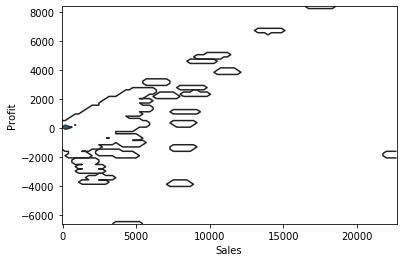

In [9]:
sns.kdeplot(df["Sales"],df["Profit"])

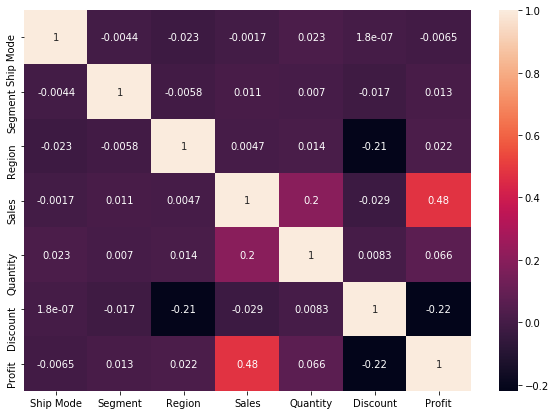

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

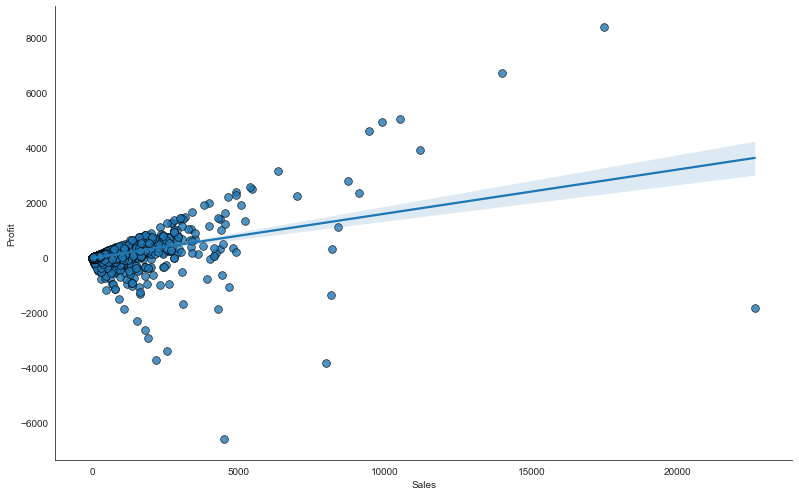

In [19]:
sns.set_style("white")
sns.lmplot(x="Sales", y="Profit", data=df, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

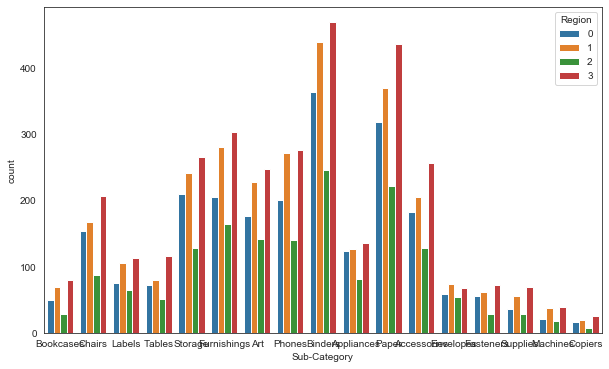

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

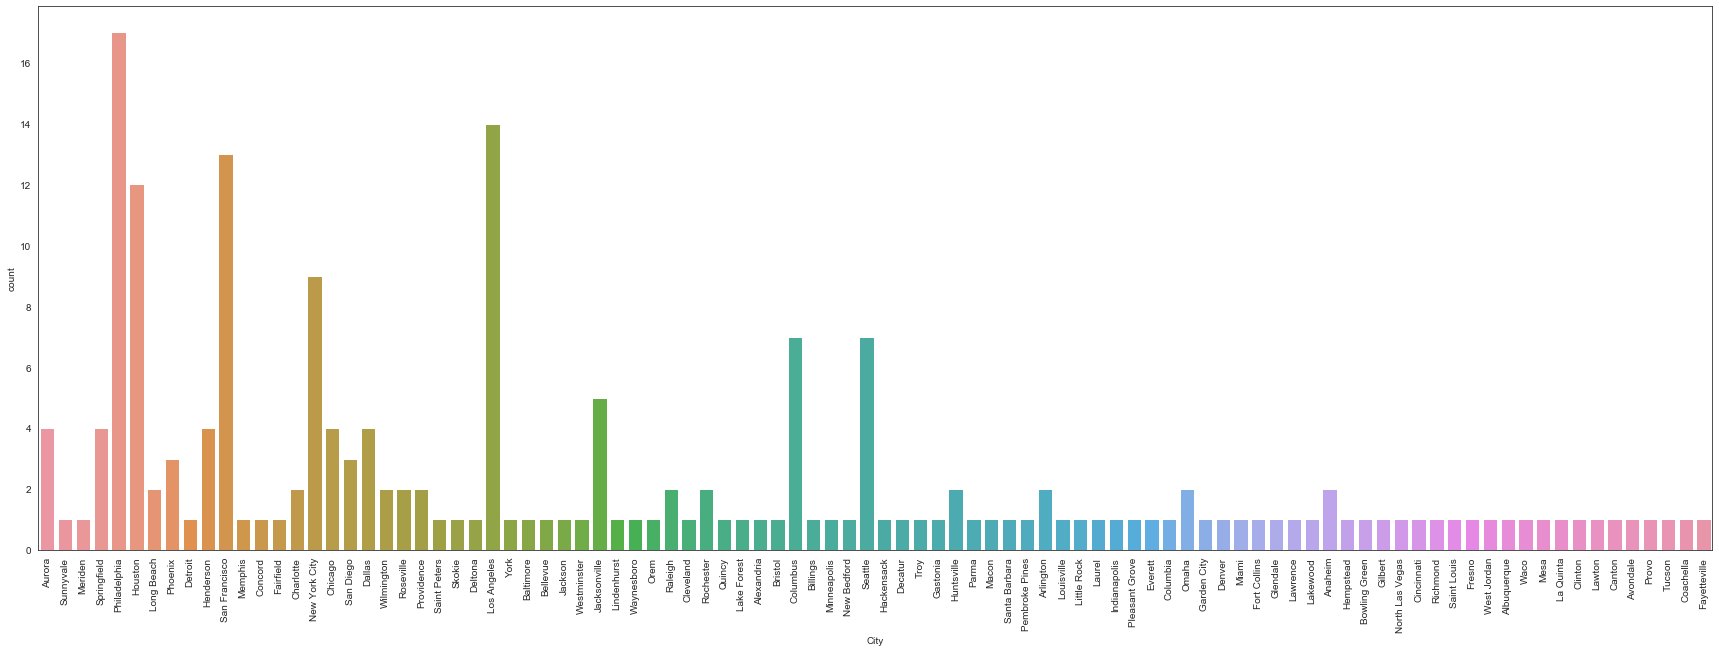

In [21]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'City',data =df.sample(n=200),)
plt.xticks(rotation = 90)
plt.show()

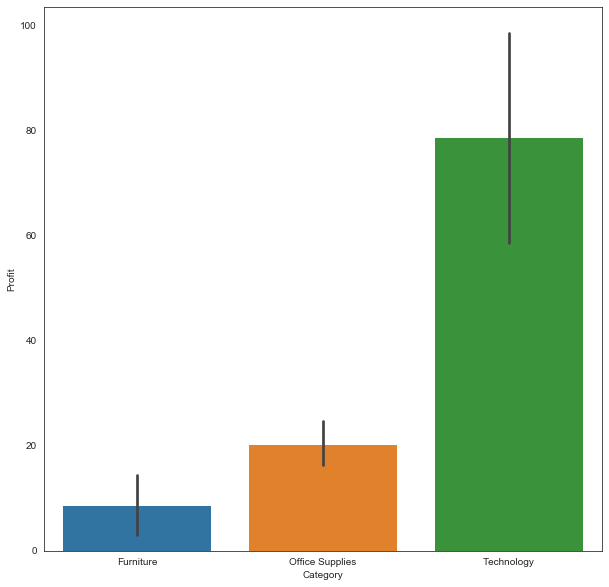

In [24]:
plt.figure(figsize = (10, 10))
sns.barplot( x="Category",y="Profit",data=df);

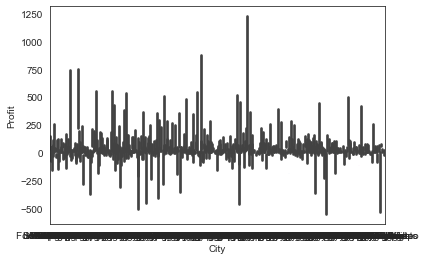

In [25]:
sns.barplot(x="City",y="Profit",data=df)

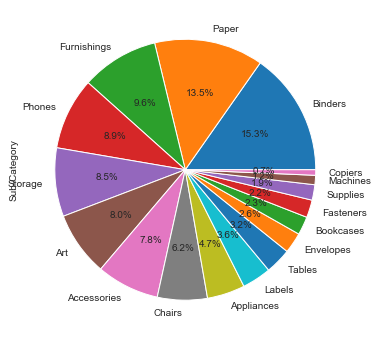

In [26]:
plt.figure(figsize=(6,6))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

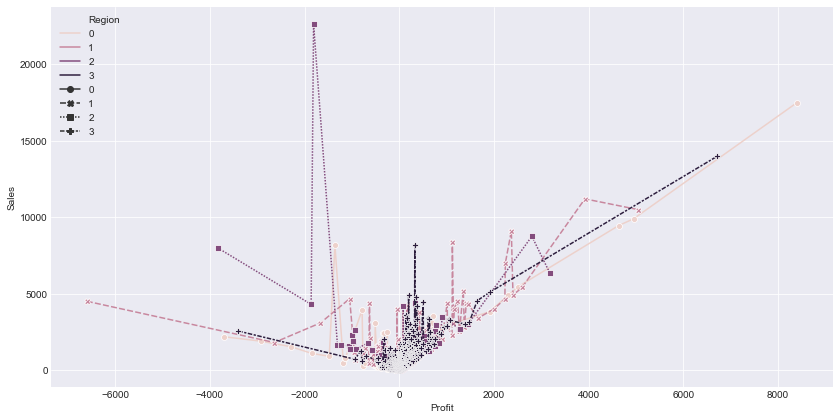

In [30]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Profit" , y="Sales" , hue = "Region" ,style="Region" , markers=True,data=df)
plt.show()

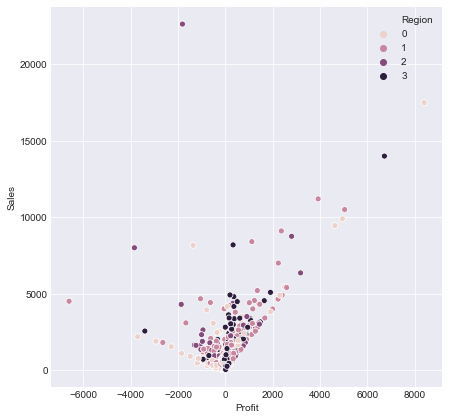

In [38]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df.Profit , y=df.Sales , hue=df.Region )
plt.show()

# BY - ANUJ KUMAR